### Notebook to supplement L05_grad-descent

In [4]:
%load_ext watermark
%watermark -a 'Scott Lucchini, Rob Morgan, Alex Pizzuto' -v -p torch,pandas,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Scott Lucchini, Rob Morgan, Alex Pizzuto 

CPython 3.6.1
IPython 6.4.0

torch 1.0.1
pandas 0.23.0
matplotlib 2.2.2


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn import datasets
%matplotlib inline

In [50]:
iris = datasets.load_iris()  # Loading dataset wasn't working, did it
                            # directly from sklearn
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.columns = ['x1', 'x2', 'x3', 'x4', 'y']
df = df.iloc[50:250]
df['y'] = df['y'].apply(lambda x: 0 if x == 1 else 1)
df.tail()

,x1,x2,x3,x4,y
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,1


In [51]:
# Assign features and target

X = torch.tensor(df[['x2', 'x3']].values, dtype=torch.float)
y = torch.tensor(df['y'].values, dtype=torch.int)

# Shuffling & train/test split

torch.manual_seed(123)
shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)

X, y = X[shuffle_idx], y[shuffle_idx]

percent70 = int(shuffle_idx.size(0)*0.7)

X_train, X_test = X[shuffle_idx[:percent70]], X[shuffle_idx[percent70:]]
y_train, y_test = y[shuffle_idx[:percent70]], y[shuffle_idx[percent70:]]

# Normalize (mean zero, unit variance)

mu, sigma = X_train.mean(dim=0), X_train.std(dim=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

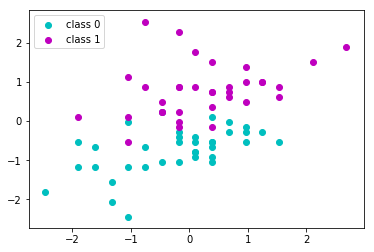

In [52]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='class 0', c = 'c')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='class 1', c = 'm')
plt.legend()
plt.show()

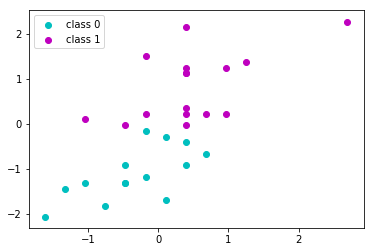

In [54]:
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], label='class 0', c = 'c')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], label='class 1', c = 'm')
plt.legend()
plt.show()